In [1]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import pickle
import torch

/home/simon/anaconda3/envs/torch_2022/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
local_dir = '/home/simon/Documents/Articles/ConflictNet/data/generated/'
local_dir_raw = '/home/simon/Documents/Articles/ConflictNet/data/raw/'

with open(f'{local_dir}posterior_dict.pkl', 'rb') as file:
    posterior_dict = pickle.load(file)

with open(f'{local_dir}test_tensor.pkl', 'rb') as file:
    test_tensor = pickle.load(file)

with open(f'{local_dir_raw}views_monthly_REP_vol.pkl', 'rb') as file:
    views_vol = pickle.load(file)

In [3]:
# data = np.ma.masked_where((views_vol[-36,:,:,6] == 0),   )

In [4]:
# test_month = 15


# posterior_list = posterior_dict['posterior_list']
# posterior_list_class = posterior_dict['posterior_list_class']
# out_of_sample_tensor = posterior_dict['out_of_sample_tensor']
# out_of_sample_numpy = out_of_sample_tensor.numpy()

# mean_class_pred = np.array(posterior_list_class[test_month]).mean(axis=0)
# mean_pred = np.array(posterior_list[test_month]).mean(axis=0)
# true_obs = out_of_sample_numpy[:,test_month,:,:].squeeze()

# std_pred = np.array(posterior_list[test_month]).std(axis=0)

# # min/max for plotting
# min_true = out_of_sample_numpy.min()
# max_true = out_of_sample_numpy.max()
# min_pred = np.array(posterior_list).min()
# max_pred = np.array(posterior_list).max()
# min_pred_class = np.array(posterior_list_class).min()
# max_pres_class = np.array(posterior_list_class).max()

# min_pred_std = np.array(posterior_list).mean(axis=0).std(axis = 0).min()
# max_pred_std = np.array(posterior_list).mean(axis=0).std(axis = 0).max()

# all_abs_error = np.abs(out_of_sample_numpy.squeeze() - np.array(posterior_list).mean(axis = 0))
# min_error = all_abs_error.min()
# max_error = all_abs_error.max()

# # abs error
# abs_error = np.abs(true_obs - mean_pred)


# # Confucsion
# threshold = 0.2 # there is a good way to do this... You have just forgotten it...

# binary_pred = (mean_class_pred > threshold) * 1 
# binary_true = (true_obs > 0)*1

# TP = ((binary_pred == 1) & (binary_true == 1)).astype('int')
# FP = ((binary_pred == 1) & (binary_true == 0)).astype('int')*2
# FN = ((binary_pred == 0) & (binary_true == 1)).astype('int')*3
# # TN = ((binary_pred == 0) & (binary_true == 0)).astype('int')*4


# confusion_map = TP + FP + FN #+ TN # TN per defualt 0

# # TN gray, TP green, FP blue, FN red
# colors = [ (0.5, 0.5, 0.5), (0, 1, 0), (0, 0, 1), (1, 0, 0)]  # R, G, B
# cmap_name = 'catagorical4'
# cat_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=4)

# # plot
# plt.figure(figsize=[30,20])


# plt.subplot(2,3,1)
# plt.title(f'true, month {test_month}')
# true_obs_masked = np.ma.masked_where((views_vol[-36,:,:,6] == 0), true_obs)
# plt.imshow(true_obs_masked, cmap = 'rainbow', vmin= min_true, vmax=max_true)
# plt.colorbar()

# plt.subplot(2,3,2)
# plt.title(f'pred, month {test_month}')
# mean_pred_masked = np.ma.masked_where((views_vol[-36,:,:,6] == 0), mean_pred)
# plt.imshow(mean_pred_masked, cmap = 'rainbow', vmin= min_pred, vmax=max_pred)
# plt.colorbar( label = f'predictited magnitude ŷ')


# plt.subplot(2,3,3)
# plt.title(f'pred class, month {test_month}')
# mean_class_pred_masked = np.ma.masked_where((views_vol[-36,:,:,6] == 0), mean_class_pred)
# plt.imshow(mean_class_pred_masked, cmap = 'rainbow', vmin= min_pred_class, vmax=max_pres_class)
# plt.colorbar()


# plt.subplot(2,3,4)
# plt.title(f'absolute error, month {test_month}')
# abs_error_masked = np.ma.masked_where((views_vol[-36,:,:,6] == 0), abs_error)
# plt.imshow(abs_error_masked, cmap = 'rainbow', vmin=min_error, vmax=max_error) # min and max are not constant here!
# plt.colorbar()


# plt.subplot(2,3,5)
# plt.title(f'pred std, month {test_month}')  # wonrg title
# std_pred_masked = np.ma.masked_where((views_vol[-36,:,:,6] == 0), std_pred)
# plt.imshow(std_pred_masked, cmap = 'rainbow', vmin=min_pred_std, vmax=max_pred_std)
# plt.colorbar()


# plt.subplot(2,3,6)
# plt.title(f'confusion_map (T=0.2)pred std, month {test_month}')  # wonrg title
# confusion_map_masked = np.ma.masked_where((views_vol[-36,:,:,6] == 0), confusion_map)
# plt.imshow(confusion_map_masked, cmap = cat_cmap, vmin=0, vmax=3)
# cbar = plt.colorbar(ticks = np.linspace(0.4,2.6,4), shrink = 0.6)
# cbar.set_ticklabels(['TN', 'TP', 'FP', 'FN'])


# plt.subplots_adjust(hspace = -0.1, wspace = -0.1)

In [8]:
# insert overall ap score.

def plt_trio(test_month, timelaps_dir, posterior_dict, views_vol):

    posterior_list = posterior_dict['posterior_list']
    posterior_list_class = posterior_dict['posterior_list_class']
    out_of_sample_tensor = posterior_dict['out_of_sample_tensor']
    out_of_sample_numpy = out_of_sample_tensor.numpy()

    mean_class_pred = np.array(posterior_list_class[test_month]).mean(axis=0)
    mean_pred = np.array(posterior_list[test_month]).mean(axis=0)
    true_obs = out_of_sample_numpy[:,test_month,:,:].squeeze()

    std_pred = np.array(posterior_list[test_month]).std(axis=0)

    # min/max for plotting
    min_true = out_of_sample_numpy.min()
    max_true = out_of_sample_numpy.max()
    min_pred = np.array(posterior_list).min()
    max_pred = np.array(posterior_list).max()
    min_pred_class = np.array(posterior_list_class).min()
    max_pres_class = np.array(posterior_list_class).max()

    min_pred_std = np.array(posterior_list).mean(axis=0).std(axis = 0).min()
    max_pred_std = np.array(posterior_list).mean(axis=0).std(axis = 0).max()

    all_abs_error = np.abs(out_of_sample_numpy.squeeze() - np.array(posterior_list).mean(axis = 0))
    min_error = all_abs_error.min()
    max_error = all_abs_error.max()

    # abs error
    abs_error = np.abs(true_obs - mean_pred)


    # Confucsion
    threshold = 0.2 # there is a good way to do this... You have just forgotten it...

    binary_pred = (mean_class_pred > threshold) * 1 
    binary_true = (true_obs > 0)*1

    TP = ((binary_pred == 1) & (binary_true == 1)).astype('int')
    FP = ((binary_pred == 1) & (binary_true == 0)).astype('int')*2
    FN = ((binary_pred == 0) & (binary_true == 1)).astype('int')*3
    # TN = ((binary_pred == 0) & (binary_true == 0)).astype('int')*4


    confusion_map = TP + FP + FN #+ TN # TN per defualt 0

    # TN gray, TP green, FP blue, FN red
    colors = [ (0.5, 0.5, 0.5), (0, 1, 0), (0, 0, 1), (1, 0, 0)]  # R, G, B
    cmap_name = 'catagorical4'
    cat_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=4)

    # plot
    plt.figure(figsize=[30,20])


    plt.subplot(2,3,1)
    plt.title(f'true, month {test_month}')
    true_obs_masked = np.ma.masked_where((views_vol[-36,:,:,6] == 0), true_obs)
    plt.imshow(true_obs_masked, cmap = 'rainbow', vmin= min_true, vmax=max_true, aspect= 'equal', interpolation = None)
    plt.colorbar(shrink = 0.6, label = 'observed magnitude y, i.e. log(best)')

    plt.subplot(2,3,2)
    plt.title(f'pred, month {test_month}')
    mean_pred_masked = np.ma.masked_where((views_vol[-36,:,:,6] == 0), mean_pred)
    plt.imshow(mean_pred_masked, cmap = 'rainbow', vmin= min_pred, vmax=max_pred, aspect= 'equal', interpolation = None)
    plt.colorbar(shrink = 0.6, label = 'predictited magnitude, ŷ ')


    plt.subplot(2,3,3)
    plt.title(f'pred class, month {test_month}')
    mean_class_pred_masked = np.ma.masked_where((views_vol[-36,:,:,6] == 0), mean_class_pred)
    plt.imshow(mean_class_pred_masked, cmap = 'rainbow', vmin= min_pred_class, vmax=max_pres_class, aspect= 'equal', interpolation = None)
    plt.colorbar(shrink = 0.6, label = 'predictited probability, ỹ')


    plt.subplot(2,3,4)
    plt.title(f'absolute error, month {test_month}')
    abs_error_masked = np.ma.masked_where((views_vol[-36,:,:,6] == 0), abs_error)
    plt.imshow(abs_error_masked, cmap = 'rainbow', vmin=min_error, vmax=max_error, aspect= 'equal', interpolation = None) # min and max are not constant here!
    plt.colorbar(shrink = 0.6, label = 'absolute error, |y-ŷ|')


    plt.subplot(2,3,5)
    plt.title(f'pred std, month {test_month}')  # wonrg title
    std_pred_masked = np.ma.masked_where((views_vol[-36,:,:,6] == 0), std_pred)
    plt.imshow(std_pred_masked, cmap = 'rainbow', vmin=min_pred_std, vmax=max_pred_std, aspect= 'equal', interpolation = None)
    plt.colorbar(shrink = 0.6,  label = 'ensemble std (predicted magnitude, ŷ)')


    plt.subplot(2,3,6)
    plt.title(f'confusion_map (T=0.2)pred std, month {test_month}')  # wonrg title
    confusion_map_masked = np.ma.masked_where((views_vol[-36,:,:,6] == 0), confusion_map)
    plt.imshow(confusion_map_masked, cmap = cat_cmap, vmin=0, vmax=3, aspect= 'equal', interpolation = None)
    cbar = plt.colorbar(ticks = np.linspace(0.4,2.6,4), shrink = 0.6)
    cbar.set_ticklabels(['TN', 'TP', 'FP', 'FN'])

    plt.subplots_adjust(hspace = -0.1, wspace = 0.1)

    fig_title = f'trio_{str(test_month).zfill(2)}'
    plt.savefig(timelaps_dir + '/' + fig_title + '.JPG', bbox_inches="tight")
    plt.cla() # idk if this is also needed..
    plt.close('all') # so they do not display or take up mem

In [9]:
timelaps_dir = '/home/simon/Documents/Articles/ConflictNet/presentation/figures/timelaps/'

for i in range(posterior_dict['out_of_sample_tensor'].shape[1]):
    plt_trio(i, timelaps_dir, posterior_dict, views_vol)

In [ ]:
# plot ap, auc, brier, and mse over month

In [ ]:
# plot corr between reg and class

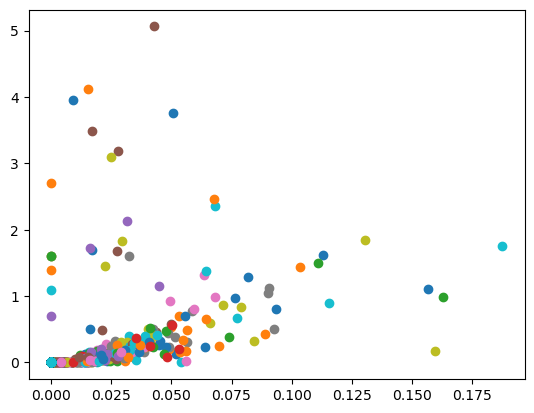

In [11]:
# plot corr std and error
test_month = 0

posterior_list = posterior_dict['posterior_list']
posterior_list_class = posterior_dict['posterior_list_class']
out_of_sample_tensor = posterior_dict['out_of_sample_tensor']
out_of_sample_numpy = out_of_sample_tensor.numpy()

mean_class_pred = np.array(posterior_list_class[test_month]).mean(axis=0)
mean_pred = np.array(posterior_list[test_month]).mean(axis=0)
true_obs = out_of_sample_numpy[:,test_month,:,:].squeeze()

std_pred = np.array(posterior_list[test_month]).std(axis=0)

# abs error
abs_error = np.abs(true_obs - mean_pred)

plt.plot(std_pred, abs_error, 'o')
plt.show()